### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

**independent variable**: congruent or incongruent condition.  
**dependent variable**: Time to complete test.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null Hypothsis, H0 - No change in time between two reading tasks (congruent or incongruent)  
Alternate Hypothesis, H1 - incongruent task take more time than congruent.  
H0: μi ≤ μc (μi - population mean of incongruent values, μc - population mean of congruent values)  

Null Hypothesis: the incongruent saying color name when it differs from the text is easier than (or just as easy as) saying it when the text matches

H1: μi > μc (μi - population mean of incongruent values, μc - population mean of congruent values) 


**statistical test**  
statistical test for our experiment would be a one-tailed t-test because our sample size less than 30 and we don't know the population standard deviations


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [29]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

In [30]:
df = pd.read_csv('./stroopdata.csv')
print(df.mean(axis=0))
print(df.std(axis=0))
print("standard deviation for congruent {0:.3f}".format(np.std(df['Congruent'].values)))
print("standard deviation for Incongruent {0:.3f}".format(np.std(df['Incongruent'].values)))

Congruent      14.051125
Incongruent    22.015917
dtype: float64
Congruent      3.559358
Incongruent    4.797057
dtype: float64
standard deviation for congruent 3.484
standard deviation for Incongruent 4.696


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

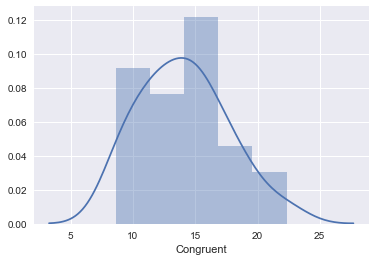

In [31]:
sns.distplot(df['Congruent'])


The data is more or less normally distributed and the middle of the data is a little bit less than 15

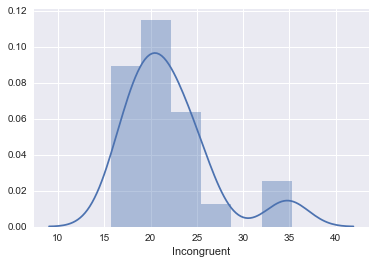

In [32]:
sns.distplot(df['Incongruent'])


There are some interesting data points on the upper end of this distribution that skew it right

The histogram plots, although both graphs visually appear somewhat positively skewed,  
the mean is pretty close to the peak in both graphs which would indicate a normal distribution

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [33]:
#Sample size
print(df['Congruent'].size)
print(df['Incongruent'].size)

24
24


In [34]:
#t-critical value for a 95% confidence level and 23 d.f.
t.ppf(.95, 23)

1.7138715277470473

For a confidence level of 95% and 23 degrees of freedom, our t-critical value ends up being *1.7139*  

Our point estimate for the difference of the means is: 22.02 - 14.05 = 7.97

Our standard deviation of the differences is calculated below.


In [35]:
df['Difference'] = df['Congruent'] - df['Incongruent']
print("standard deviation for congruent {0:.4f}".format(df['Difference'].std(axis=0)))

standard deviation for congruent 4.8648


### t-statistic:

In [36]:
7.97/(4.8648 / math.sqrt(24))

8.025996238275749

Our t-statistic (**8.02**) is greater than our critical value (**1.7139**),So we can **reject the null hypothesis**.  
Which matches up with what we expected, That it takes much less time to do the congruent task than it does to do the incongruent task.

## References

https://en.wikipedia.org/wiki/Stroop_effect

http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/